In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.test.gpu_device_name())

/device:GPU:0


In [3]:
# Plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [4]:
# Plot misclassified images
import pandas as pd

def plot_misclasified_examples(x, true_lables, predicted_lables, n=5, print_misclassified=False, labels=None):
  misclassified_idx = np.where(predicted_lables != true_lables)[0]
  misclassified_random_idxes = np.random.choice(misclassified_idx, n*n)
  plt.figure(figsize=(15,15))
  for i in range(n*n):
      idx = misclassified_random_idxes[i]
      plt.subplot(n,n,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[idx], cmap='gray')
      if labels==None:
        plt.xlabel("True  %s, Pred: %s" % (true_lables[idx], predicted_lables[idx]))
      else:
        plt.xlabel("True  %s, Pred: %s" % (labels[true_lables[idx]], labels[predicted_lables[idx]]))
  plt.show()

  if print_misclassified:
      if labels==None:
        print(pd.DataFrame({'idx':misclassified_random_idxes,
                            'true':true_lables[misclassified_random_idxes],
                            'pred':predicted_lables[misclassified_random_idxes]}))
      else:
        print(pd.DataFrame({'idx':misclassified_random_idxes,
                        #'true':labels[true_lables[misclassified_random_idxes]],
                        'true':true_lables[misclassified_random_idxes],
                        #'pred':labels[predicted_lables[misclassified_random_idxes]]}))
                        'pred':predicted_lables[misclassified_random_idxes]}))
        

def plot_examples(x, y, cmap, labels=None):
  plt.figure(figsize=(15,15))
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(x[i], cmap=cmap)
      if labels==None:
        plt.xlabel(y[i])
      else:
        plt.xlabel(labels[y[i]])
  plt.show()


In [5]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test)  = cifar.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

K = len(set(y_train))
N = x_train.shape[0]
print("number of classes:", K)

# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

170508288/170498071 [==============================] - 3s 0us/step
number of classes: 10


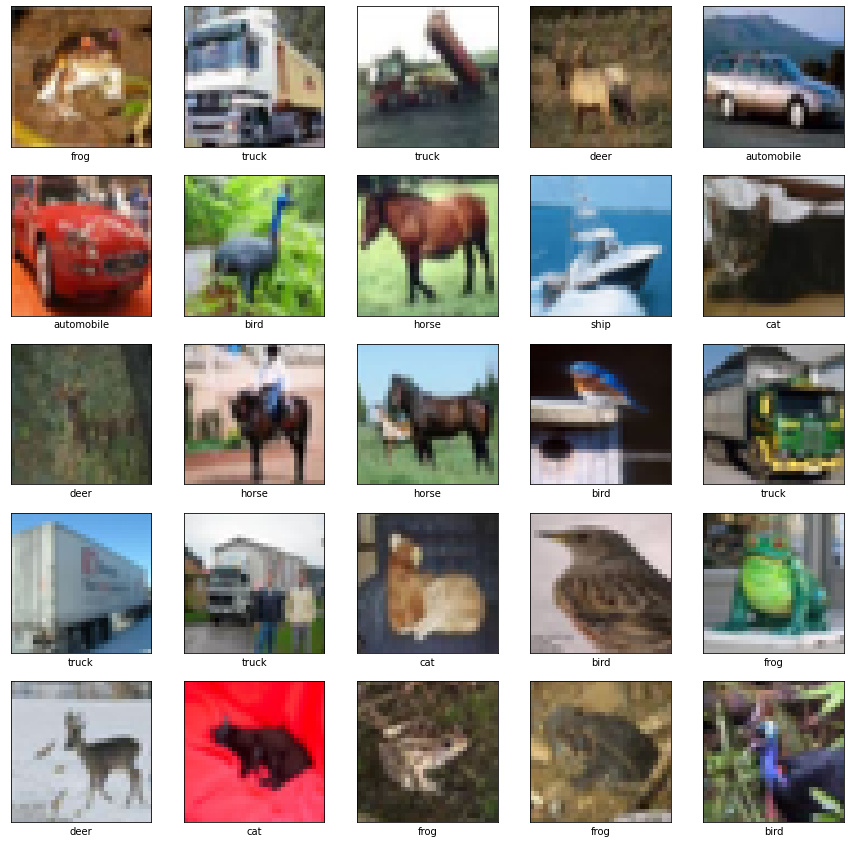

In [6]:
plot_examples(x_train, y_train, 'gray', labels=labels)

In [8]:
i = Input(shape=x_train[0].shape)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 59s 18ms/step - loss: 1.3059 - accuracy: 0.5498 - val_loss: 1.5935 - val_accuracy: 0.4834
Epoch 2/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.8509 - accuracy: 0.7048 - val_loss: 0.8530 - val_accuracy: 0.7050
Epoch 3/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.6968 - accuracy: 0.7598 - val_loss: 0.7869 - val_accuracy: 0.7374
Epoch 4/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5853 - accuracy: 0.7988 - val_loss: 0.6979 - val_accuracy: 0.7679
Epoch 5/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.4985 - accuracy: 0.8288 - val_loss: 0.6948 - val_accuracy: 0.7748
Epoch 6/50
1563/1563 [==============================] - 29s 18ms/step - loss: 0.4273 - accuracy: 0.8532 - val_loss: 0.6037 - val_accuracy: 0.8011
Epoch 7/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.3594 - accuracy: 0.8756 - val_loss: 0.6188 -

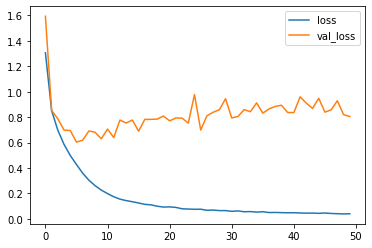

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

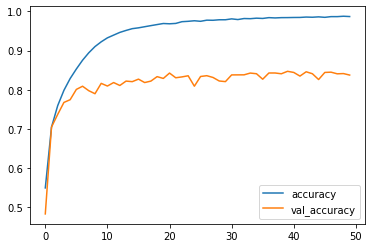

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [12]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)

history2 = model.fit(train_generator, steps_per_epoch=N//batch_size, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1562/1562 [==============================] - 55s 35ms/step - loss: 0.5379 - accuracy: 0.8268 - val_loss: 0.5291 - val_accuracy: 0.8320
Epoch 2/50
1562/1562 [==============================] - 54s 34ms/step - loss: 0.4337 - accuracy: 0.8572 - val_loss: 0.5203 - val_accuracy: 0.8349
Epoch 3/50
1562/1562 [==============================] - 53s 34ms/step - loss: 0.4039 - accuracy: 0.8654 - val_loss: 0.4861 - val_accuracy: 0.8531
Epoch 4/50
1562/1562 [==============================] - 53s 34ms/step - loss: 0.3883 - accuracy: 0.8702 - val_loss: 0.4454 - val_accuracy: 0.8601
Epoch 5/50
1562/1562 [==============================] - 54s 34ms/step - loss: 0.3646 - accuracy: 0.8785 - val_loss: 0.4597 - val_accuracy: 0.8496
Epoch 6/50
1562/1562 [==============================] - 54s 34ms/step - loss: 0.3553 - accuracy: 0.8804 - val_loss: 0.4379 - val_accuracy: 0.8541
Epoch 7/50
1562/1562 [==============================] - 53s 34ms/step - loss: 0.3371 - accuracy: 0.8874 - val_loss: 0.4247 -

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)        1849

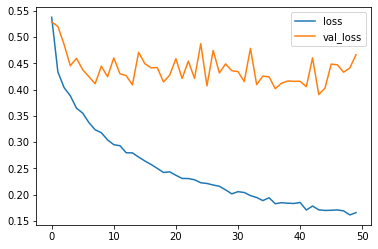

In [13]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.legend()

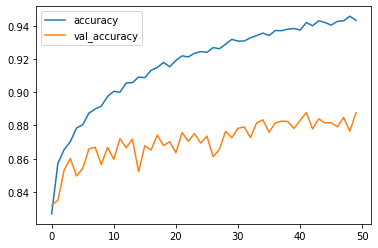

In [14]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion matrix, without normalization
[[871   9  21  13  10   3   7  10  44  12]
 [  2 968   1   1   0   0   1   1   5  21]
 [ 18   3 837  28  28  29  39  11   3   4]
 [  7   3  28 756  28 100  54  16   4   4]
 [  4   0  29  21 874  17  37  14   4   0]
 [  5   1  15  82  23 835  18  18   1   2]
 [  3   1  11  16   6   4 955   3   1   0]
 [  3   0   9  12  24  22   4 921   1   4]
 [ 18   9   1   6   3   1   7   2 947   6]
 [ 11  47   1   1   3   3   7   1  13 913]]


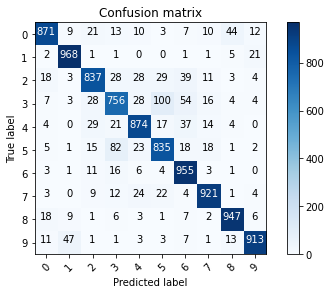

In [15]:
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

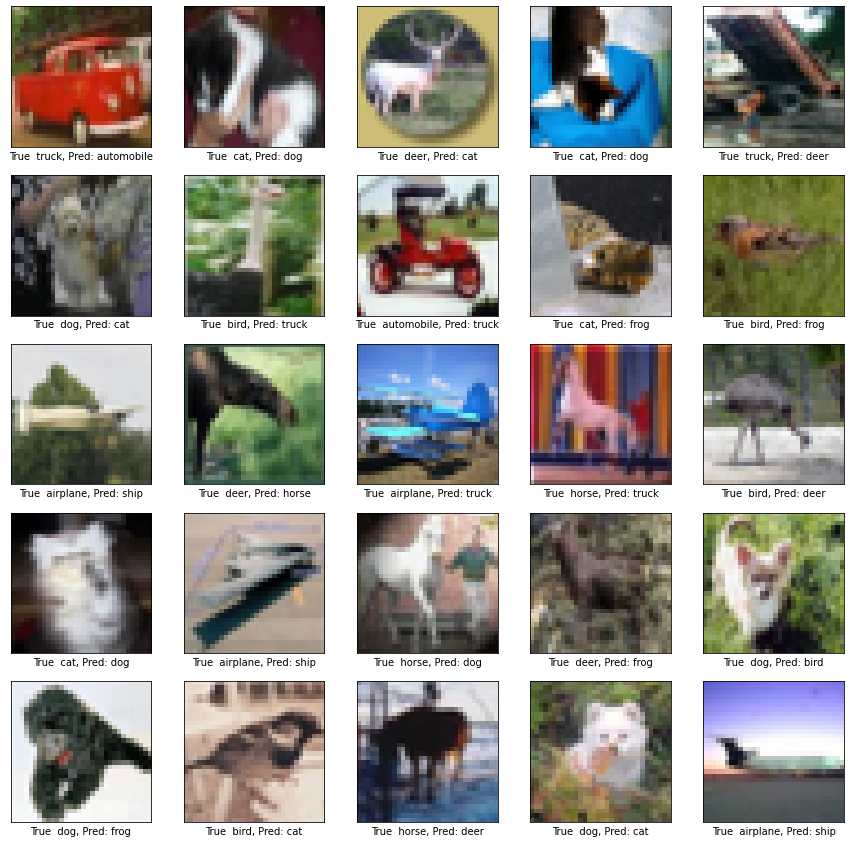

     idx  true  pred
0   1732     9     1
1   2923     3     5
2   1049     4     3
3   8580     3     5
4   3980     9     4
5   1577     5     3
6   3474     2     9
7   1969     1     9
8   8952     3     6
9   3596     2     6
10  6180     0     8
11  6401     4     7
12  5392     0     9
13  3995     7     9
14  8443     2     4
15  8245     3     5
16   264     0     8
17  1057     7     5
18  5227     4     6
19  9300     5     2
20  4921     5     6
21  7875     2     3
22  5211     7     4
23  4275     5     3
24  7436     0     8


In [16]:
plot_misclasified_examples(x_test, y_test, p_test, print_misclassified=True, labels=labels)